In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Dummy classifier

In [2]:
from sklearn.dummy import DummyClassifier
train_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# dummy_X = train_data.drop("target", axis = 1)
# dummy_y = train_data["target"]

# classifier = DummyClassifier()

# classifier.fit(dummy_X,dummy_y)

# dummy_pred = classifier.predict(test_data)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': dummy_pred})

# submission.to_csv("submission.csv", index=False)

# Exploratory Data Analysis ( EDA )

In [3]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [4]:
train_data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [6]:
# checking for null values
null_columns = train_data.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

so many missing vlaues. these will be handled in preprocessing part

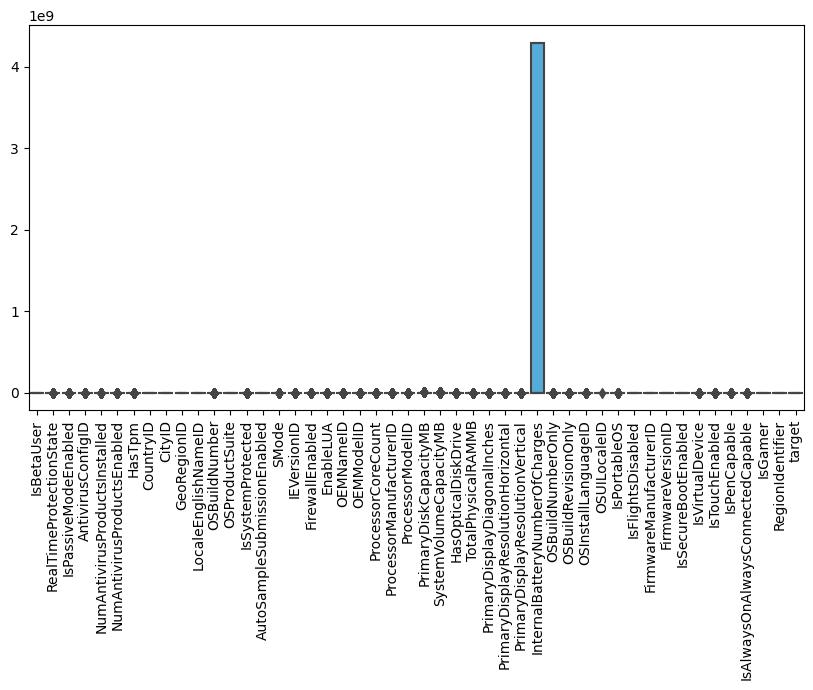

In [7]:
# Checking for outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)  
plt.show()


In [8]:
train_data.describe().T.sort_values("max", ascending=False)


,count,mean,std,min,25%,50%,75%,max
InternalBatteryNumberOfCharges,99485.0,1.118069e+09,1.884682e+09,0.0,0.0,0.0,4.294967e+09,4.294967e+09
PrimaryDiskCapacityMB,99890.0,5.158619e+05,3.525624e+05,12288.0,244198.0,476940.0,9.538690e+05,7.630885e+06
SystemVolumeCapacityMB,99890.0,3.819905e+05,3.246240e+05,10880.0,120841.0,256765.5,4.761020e+05,6.630319e+06
OEMModelID,99772.0,2.387809e+05,7.170848e+04,22.0,189586.0,246528.0,3.027670e+05,3.453240e+05
TotalPhysicalRAMMB,99849.0,6.132087e+03,4.813883e+03,512.0,4096.0,4096.0,8.192000e+03,2.621440e+05
CityID,99377.0,8.102994e+04,4.894403e+04,7.0,36694.0,82373.0,1.228350e+05,1.679570e+05
FirmwareVersionID,99666.0,3.294265e+04,2.115197e+04,121.0,13020.0,33066.0,5.235700e+04,7.209100e+04
AntivirusConfigID,99924.0,4.797571e+04,1.380332e+04,39.0,49480.0,53447.0,5.344700e+04,7.049000e+04
OSBuildRevisionOnly,100000.0,9.865314e+02,2.971430e+03,0.0,167.0,285.0,5.470000e+02,1.797600e+04
OSBuildNumberOnly,100000.0,1.599060e+04,1.810757e+03,10240.0,16299.0,16299.0,1.713400e+04,1.776300e+04


So this column named "InternalBatteryNumberOfCharges" has extreme outlier, that could be problematic.

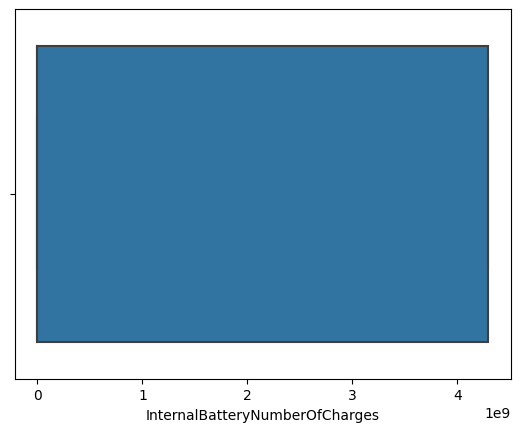

In [9]:
import seaborn as sns  
import matplotlib.pyplot as plt  

sns.boxplot(x=train_data['InternalBatteryNumberOfCharges'])   
plt.show()



In [10]:
train_data['InternalBatteryNumberOfCharges'].value_counts()


InternalBatteryNumberOfCharges
0.000000e+00    58047
4.294967e+09    25788
1.000000e+00      540
2.000000e+00      312
1.600000e+01      288
                ...  
1.080000e+03        1
3.903700e+04        1
5.490000e+02        1
2.565000e+03        1
7.968000e+03        1
Name: count, Length: 1760, dtype: int64

this no 4.29 billion is appearing so many time and as the column name suggests its the number of charges for internal battery so it's nonpractical. have to replace it

# Feature Engineering

In [11]:
def battery_feature_engineering(df):
    df = df.copy()
    df['BatteryChargeCategory'] = pd.cut(df['InternalBatteryNumberOfCharges'], 
                                     bins=[-1, 0, 10, 100, 1000, np.inf], 
                                     labels=['No Charge', 'Low', 'Medium', 'High', 'Very High'])
    return df

# Pipelines

## Preprocessing pipeline with feature engineering

In [12]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay



# Create a FunctionTransformer for the battery feature engineering step
battery_transformer = FunctionTransformer(battery_feature_engineering)

# First, separate features (X) and target (y)
X = train_data.drop(columns=['target'])
y = train_data['target']

# Define an outer pipeline that first applies battery feature engineering
# Then applies the ColumnTransformer that handles numeric and categorical columns

# Identify the original numeric and categorical columns BEFORE battery feature engineering
# Note: After battery_feature_engineering, an additional column ('BatteryChargeCategory') is added.
categorical_cols = list(X.select_dtypes(include=['object', 'category']).columns)
numeric_cols = list(X.select_dtypes(include=['float64', 'int64']).columns)

# After adding the new feature, append it to categorical columns.
# (Ensure it is not already in the categorical_cols list)
if 'BatteryChargeCategory' not in categorical_cols:
    categorical_cols.append('BatteryChargeCategory')

# Define preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine the numeric and categorical pipelines using ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create the overall pipeline: first battery transformation, then standard preprocessing
full_preprocessing_pipeline = Pipeline(steps=[
    ('battery_feature_engineering', battery_transformer),
    ('preprocessor', preprocessor)
])

# Apply the full preprocessing pipeline to the training data
X_preprocessed = full_preprocessing_pipeline.fit_transform(X)

# Ensure that you apply the same pipeline to test data to maintain consistency.
test_data_preprocessed = full_preprocessing_pipeline.transform(test_data)

# Now, perform train-test split on the preprocessed training data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("Preprocessing complete!")


Preprocessing complete!


## Preprocessing Pipeline without feature engineering

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Separate the features as X and target as y
X = train_data.drop(columns=['target'])
y = train_data['target']

# Define the preprocessing pipeline

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Define the preprocessing for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)
test_data_preprocessed = preprocessor.transform(test_data)

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("done")

done


In [14]:
# Fit the preprocessor and transform the data
train_preprocessed = preprocessor.fit_transform(train_data)

# Retrieve feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame with proper column names
train_preprocessed_df = pd.DataFrame(train_preprocessed, columns=feature_names)


encoder = OrdinalEncoder()
train_data['target'] = encoder.fit_transform(train_data['target'].values.reshape(-1, 1))
train_preprocessed_df['target'] = train_data['target']

train_preprocessed_df.head()

,num__IsBetaUser,num__RealTimeProtectionState,num__IsPassiveModeEnabled,num__AntivirusConfigID,num__NumAntivirusProductsInstalled,num__NumAntivirusProductsEnabled,num__HasTpm,num__CountryID,num__CityID,num__GeoRegionID,...,cat__OSEdition,cat__OSSkuFriendlyName,cat__OSInstallType,cat__AutoUpdateOptionsName,cat__OSGenuineState,cat__LicenseActivationChannel,cat__FlightRing,cat__DateAS,cat__DateOS,target
0,0.0,0.149356,-0.133925,0.396528,-0.627359,-0.117656,0.056837,-0.905124,0.803468,-0.804382,...,1.0,1.0,7.0,5.0,1.0,2.0,3.0,2528.0,80.0,0.0
1,0.0,0.149356,-0.133925,0.396528,-0.627359,-0.117656,0.056837,0.522046,0.652252,-0.030740,...,11.0,12.0,6.0,2.0,1.0,0.0,3.0,2103.0,98.0,1.0
2,0.0,0.149356,-0.133925,0.396528,-0.627359,-0.117656,0.056837,-0.905124,-0.804879,-0.804382,...,1.0,1.0,5.0,2.0,1.0,1.0,3.0,2613.0,106.0,1.0
3,0.0,0.149356,-0.133925,-0.113256,1.293941,-0.117656,0.056837,-0.635547,-1.260946,1.191391,...,1.0,1.0,8.0,5.0,1.0,0.0,3.0,2551.0,70.0,1.0
4,0.0,0.149356,-0.133925,-0.544261,1.293941,-0.117656,0.056837,-1.031984,0.753643,-1.308932,...,11.0,12.0,6.0,2.0,1.0,2.0,3.0,2563.0,106.0,0.0


# Visualizations

In [15]:
# Histograms
train_data.hist(figsize=(120,80), bins=30)
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


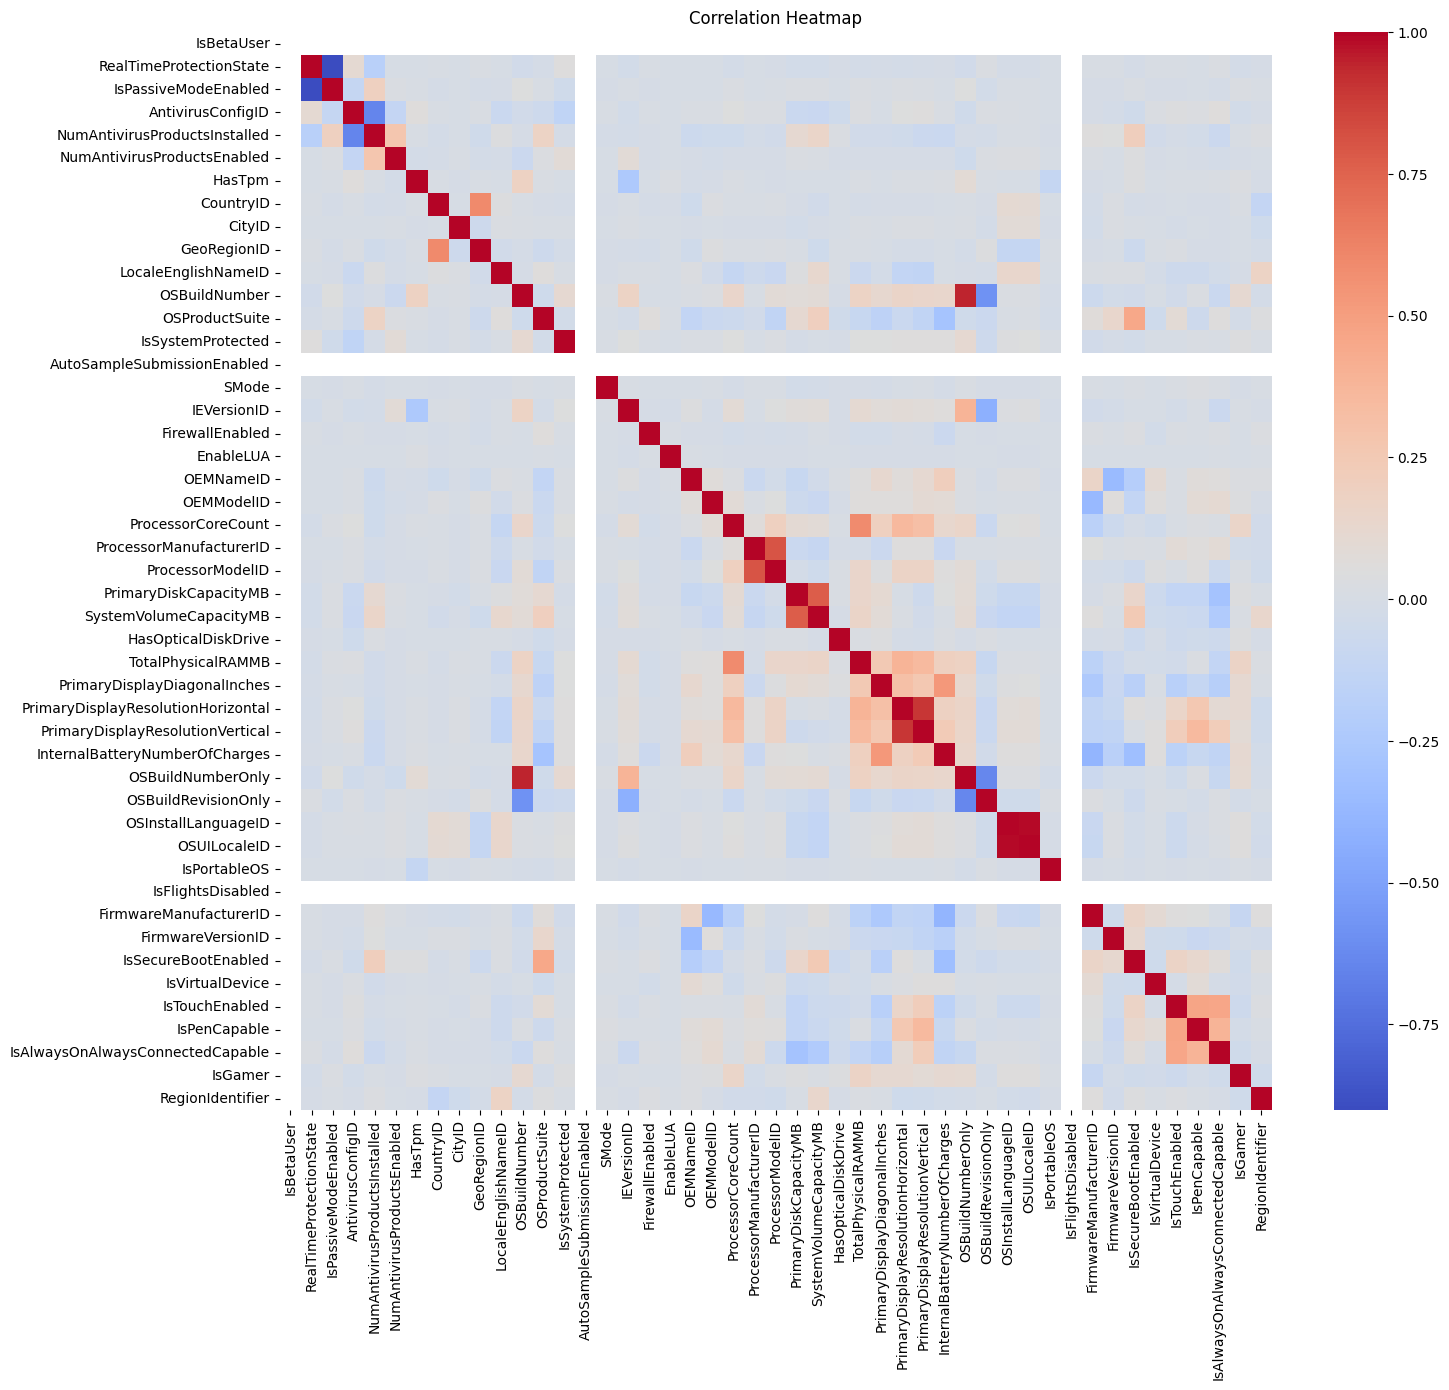

In [16]:
import seaborn as sns

plt.figure(figsize=(16, 14))
corr_matrix = train_data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

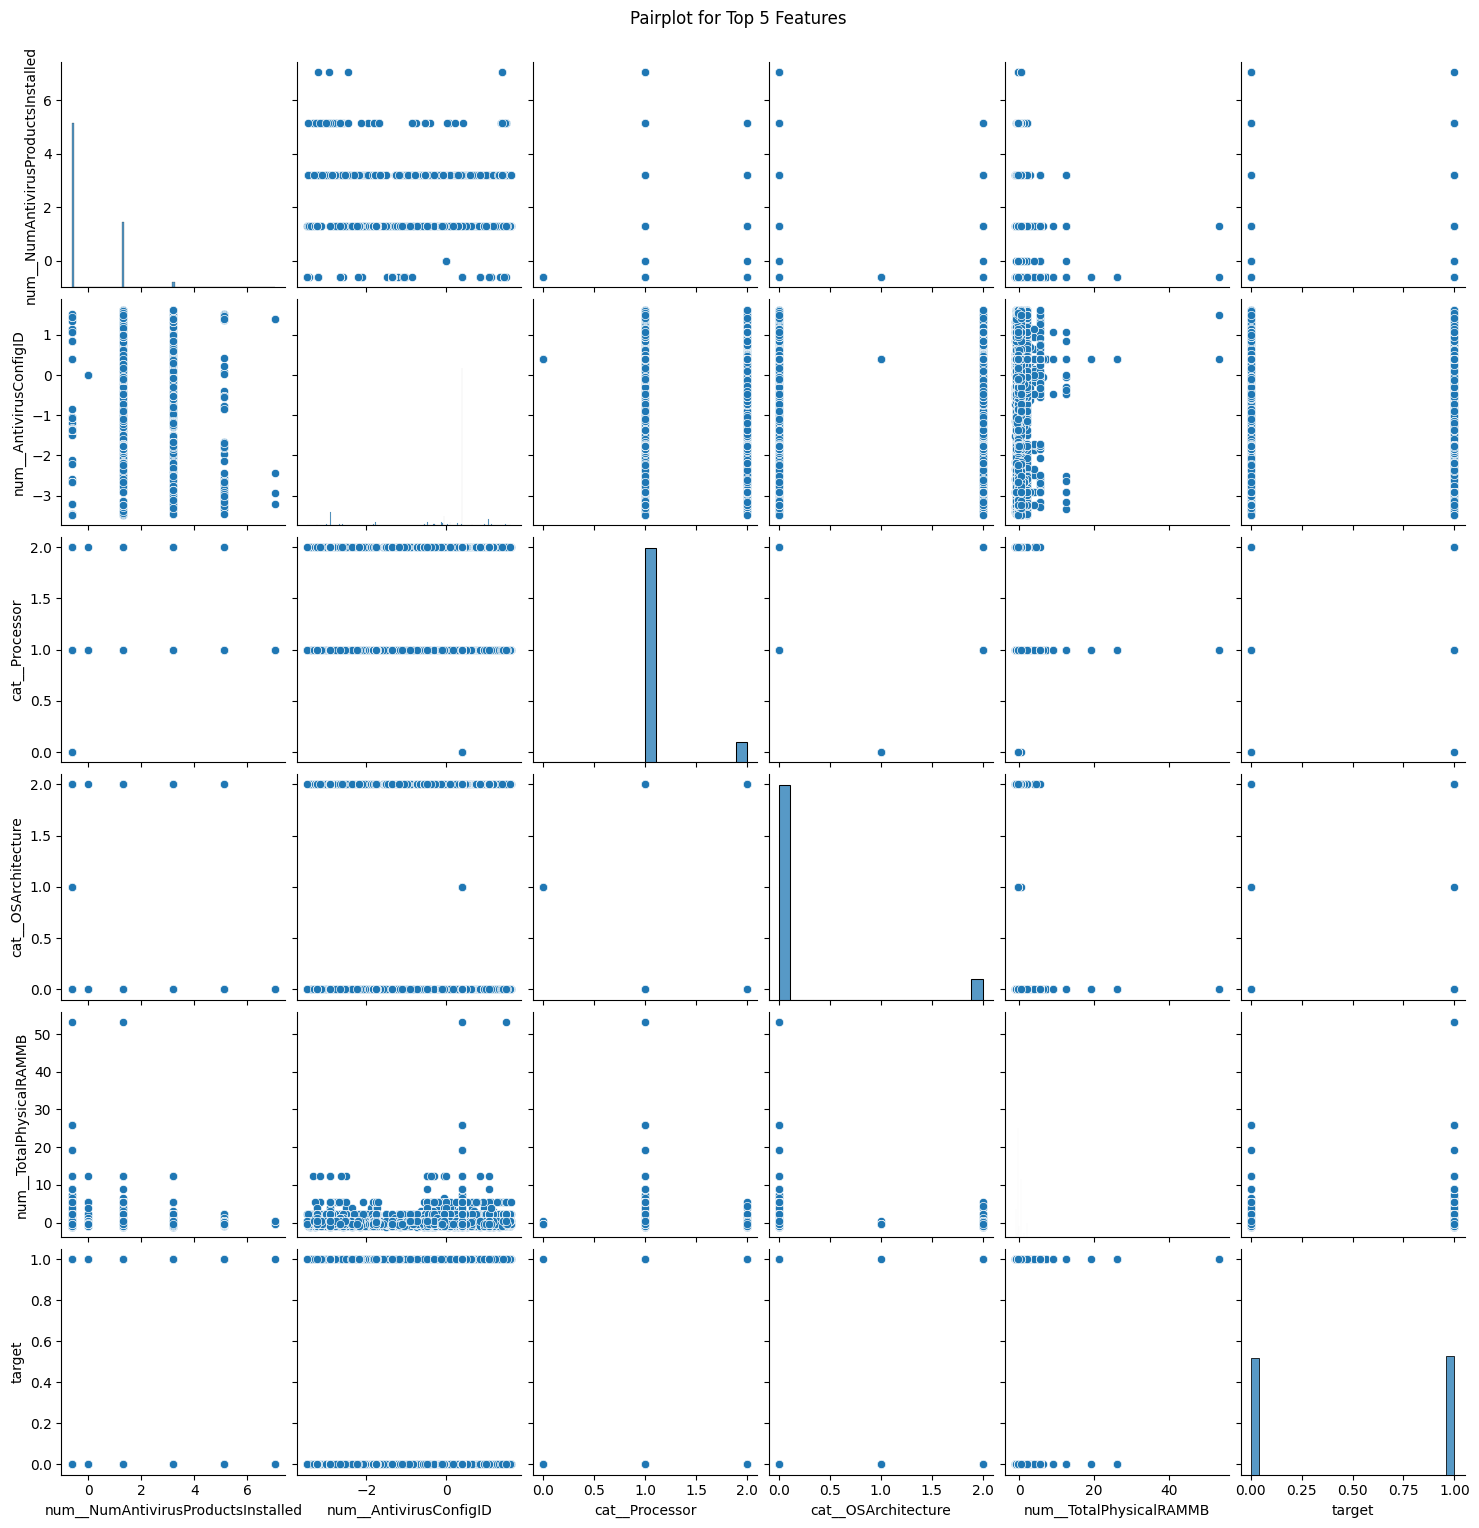

In [17]:
import pandas as pd

# Calculate correlations with the target variable (if numeric)
target_corr = train_preprocessed_df.corr()['target'].drop('target').abs()
# Select top 5 features most correlated with the target
top_features = target_corr.sort_values(ascending=False).head(5).index.tolist()

sns.pairplot(train_preprocessed_df[top_features + ['target']])
plt.suptitle('Pairplot for Top 5 Features', y=1.02)
plt.show()


In [18]:
target_corr.sort_values(ascending=False).head(5)

num__NumAntivirusProductsInstalled    0.151317
num__AntivirusConfigID                0.118259
cat__Processor                        0.073286
cat__OSArchitecture                   0.072863
num__TotalPhysicalRAMMB               0.065698
Name: target, dtype: float64

These are the 5 most important columns. Although none shows a strong correlation.


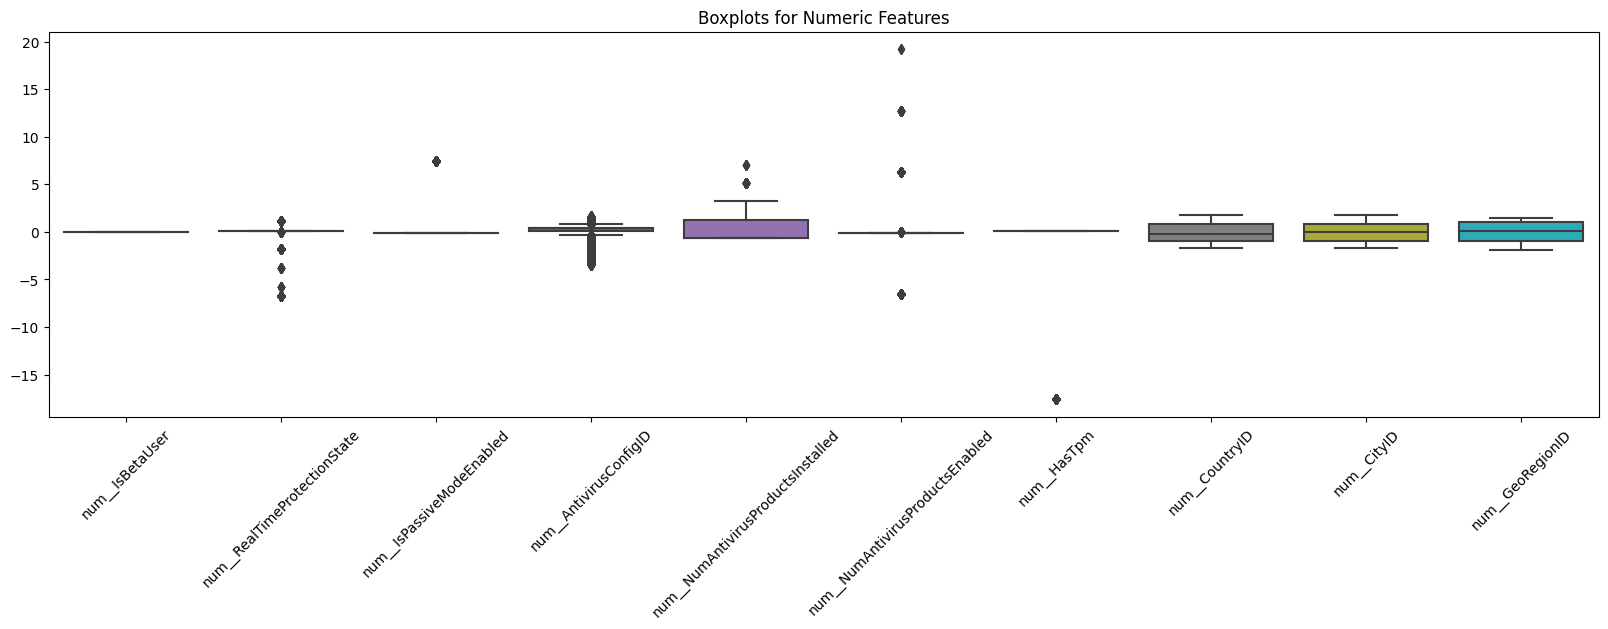

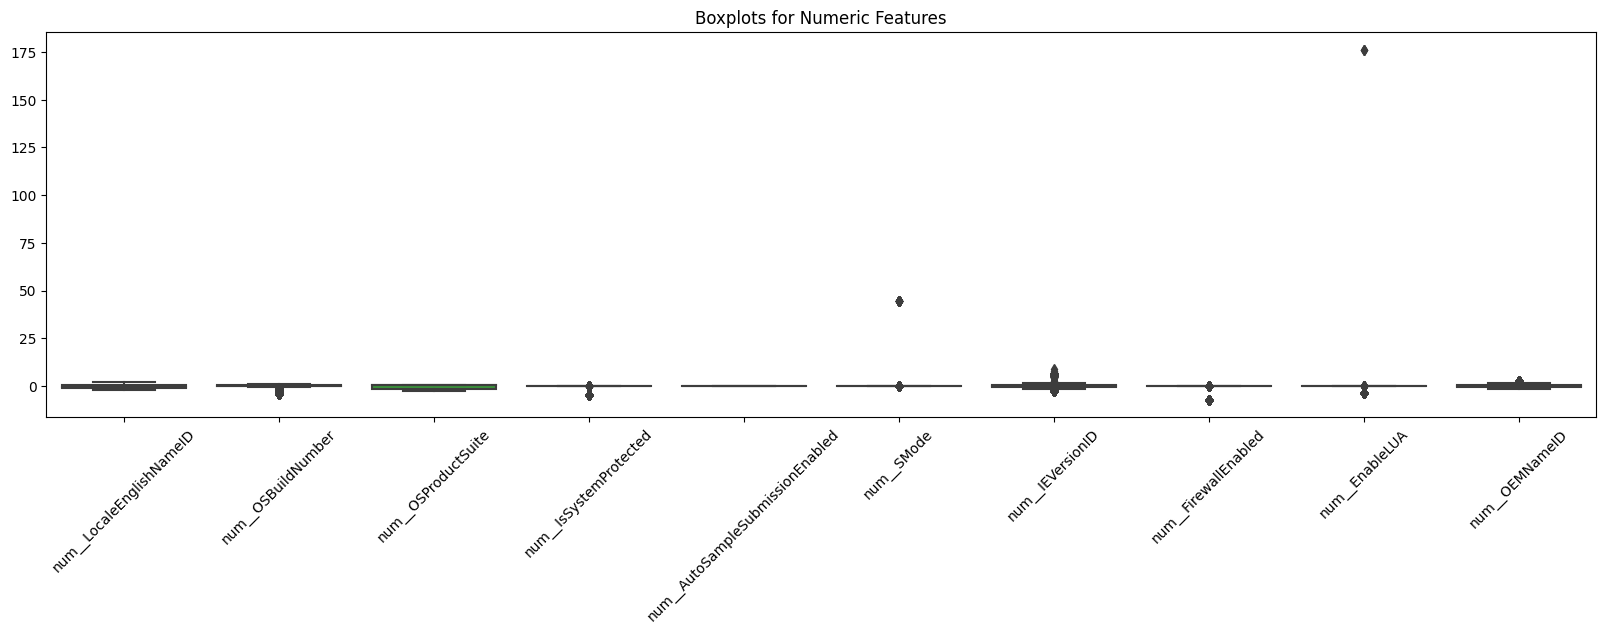

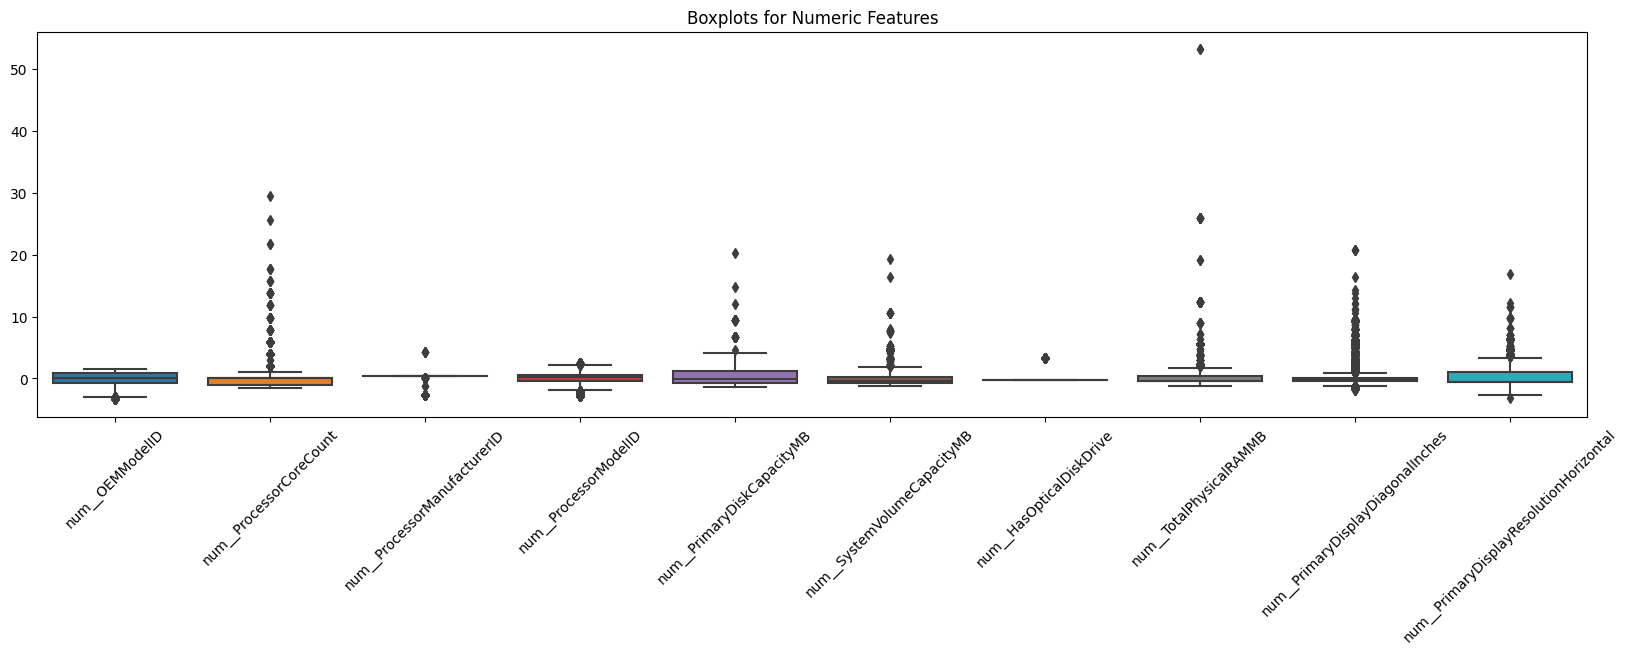

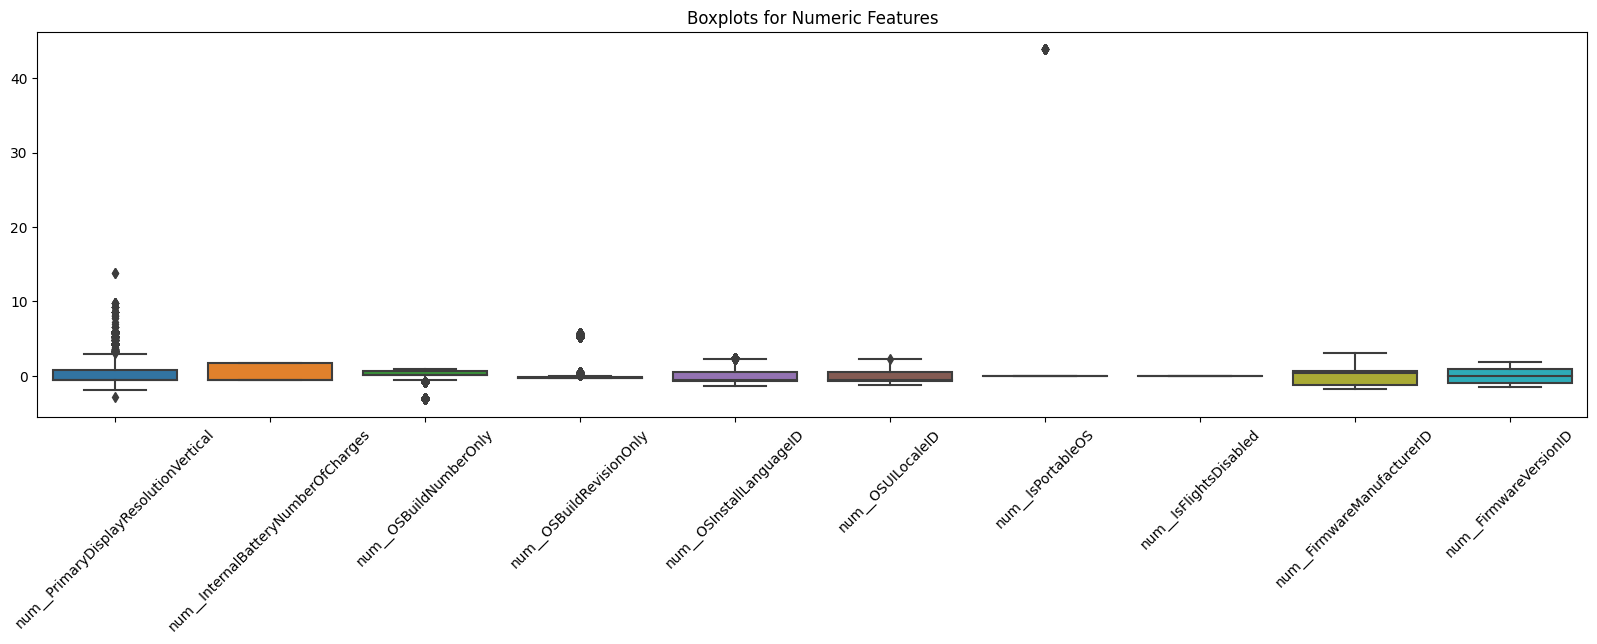

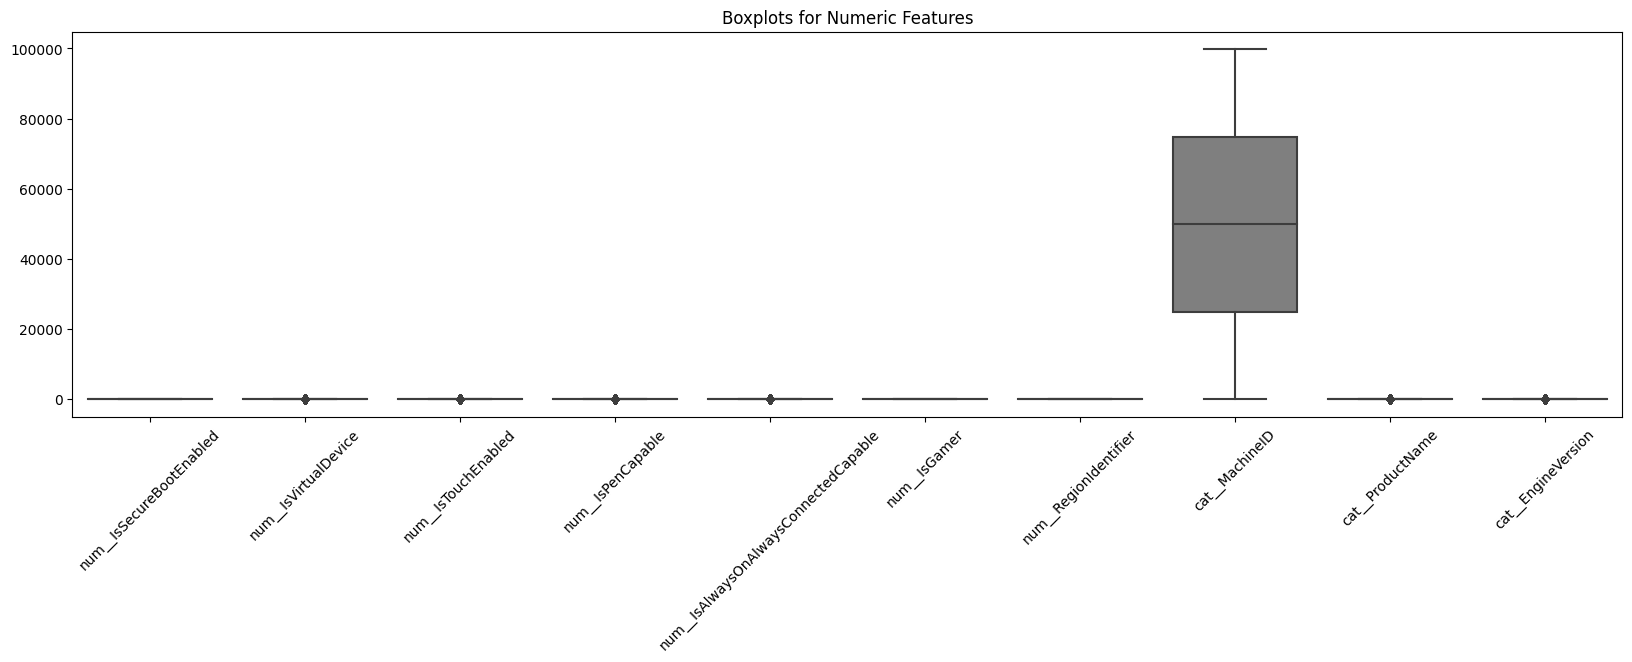

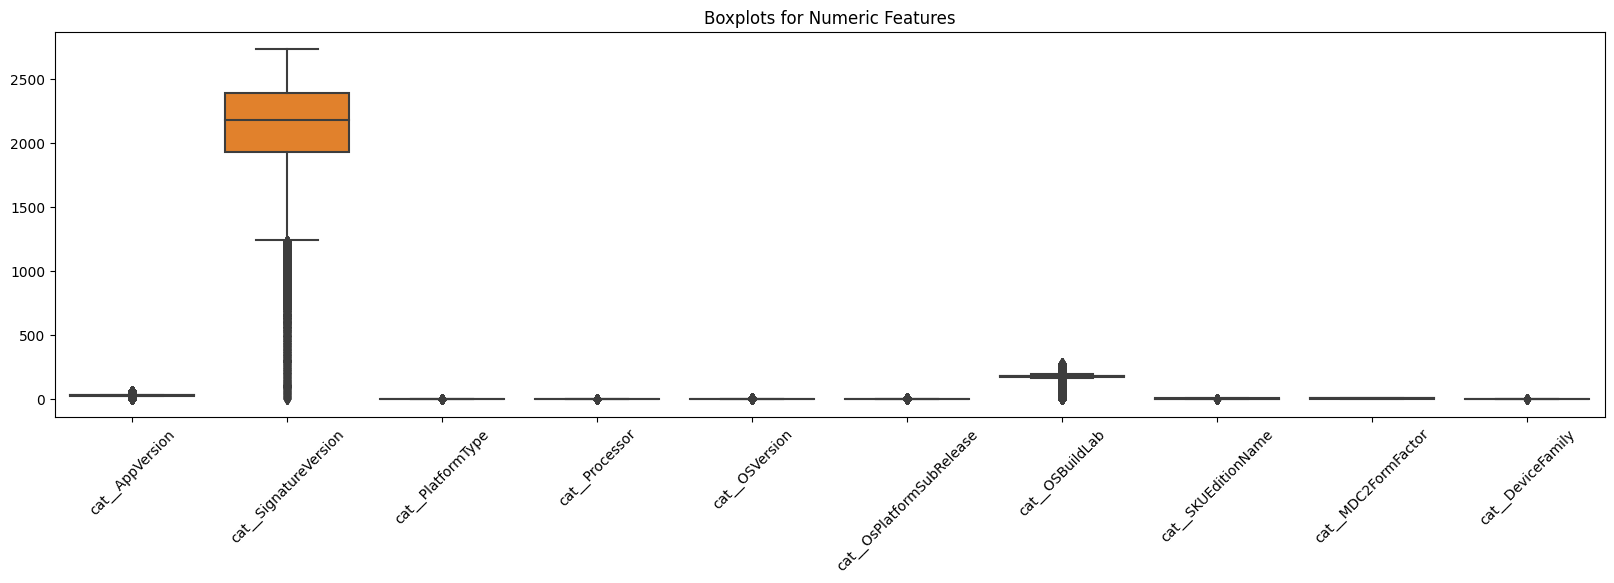

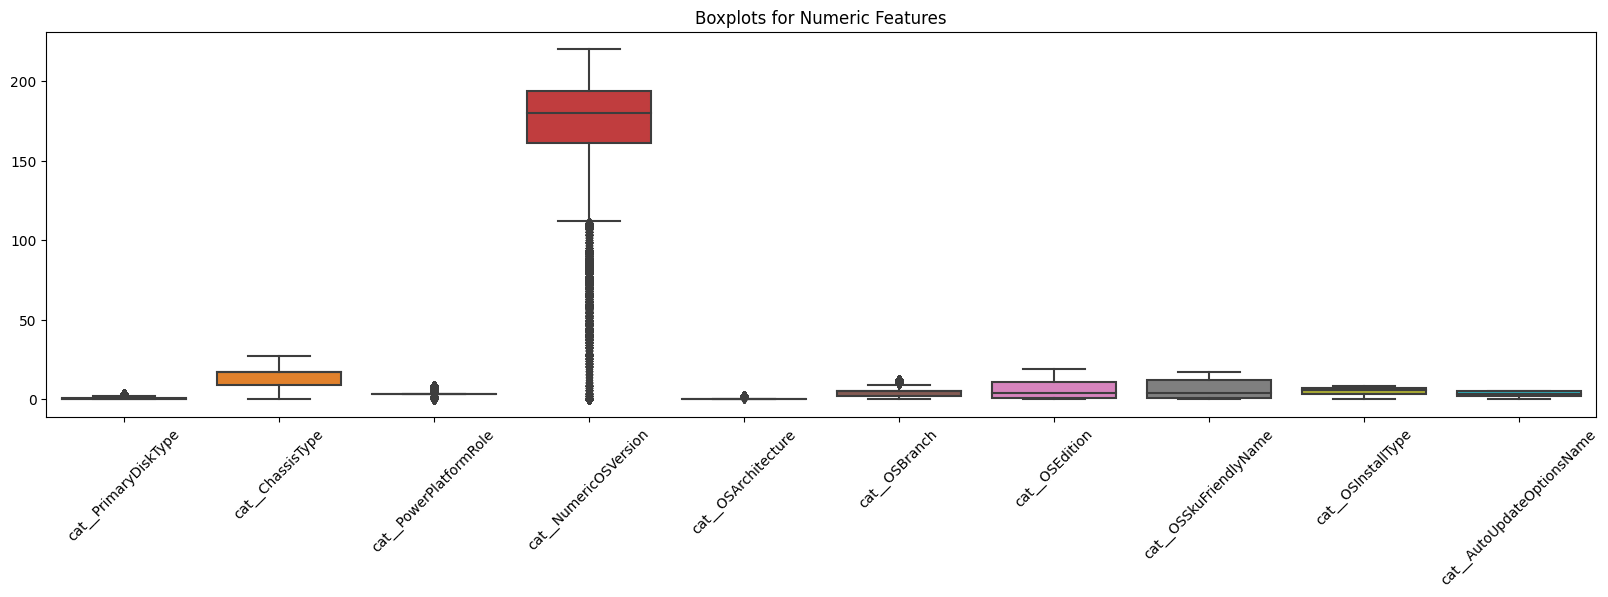

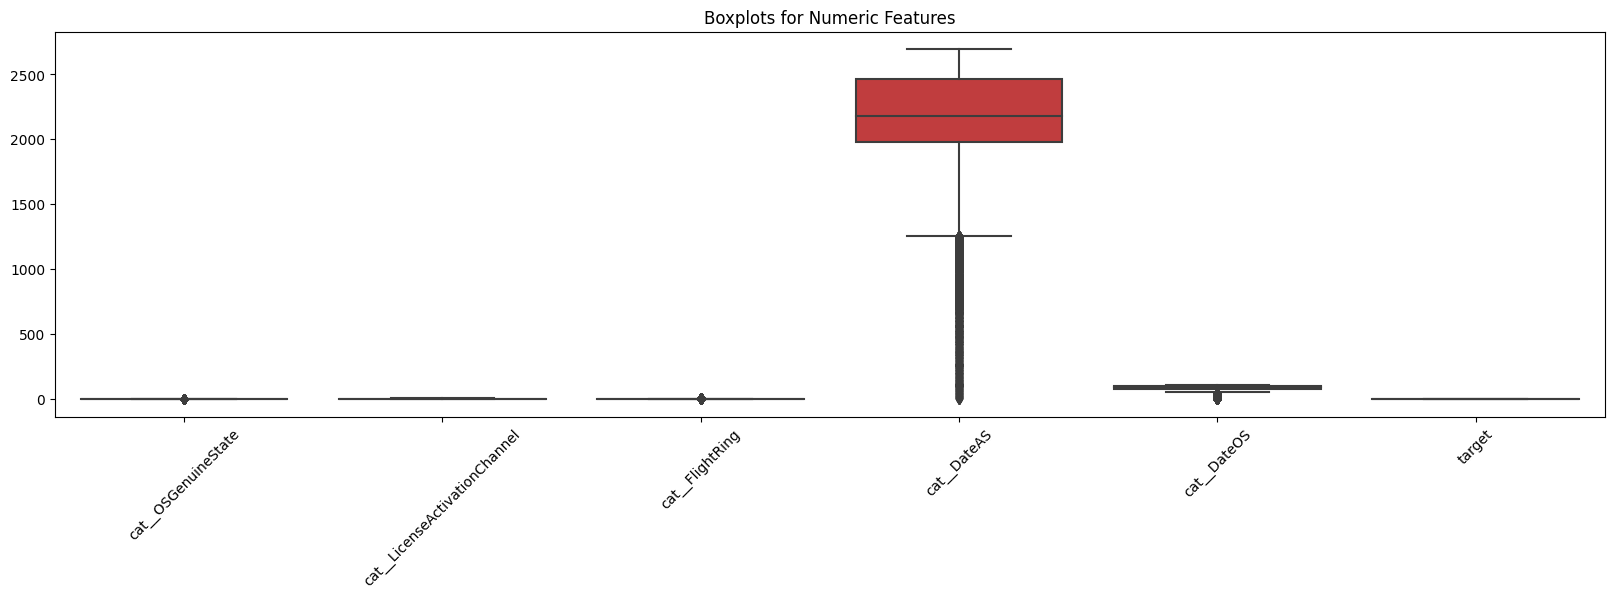

In [19]:
group_size = 10  # number of features (columns) per figure
n_cols = train_preprocessed_df.shape[1]

for i in range(0, n_cols, group_size):
    plt.figure(figsize=(20, 5))
    subset = train_preprocessed_df.iloc[:, i:i+group_size]
    sns.boxplot(data=subset)
    plt.xticks(rotation=45)
    plt.title('Boxplots for Numeric Features')
    plt.show()


# Random Forest Classifier

In [20]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the Random Forest model
# rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rfc_model.fit(X_train, y_train)

# # Make predictions
# y_pred = rfc_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_model.classes_)
# disp.plot()
# plt.show()


In [21]:
# # Submission 

# pred = rfc_model.predict(test_data_preprocessed)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': pred})

# submission.to_csv("submission.csv", index=False)
# print("done")

# XG_Boost Classifier

In [22]:
# import xgboost as xgb
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the XGBoost model
# xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
# xgboost_model.fit(X_train, y_train)

# # Make predictions
# y_pred = xgboost_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgboost_model.classes_)
# disp.plot()
# plt.show()


In [23]:
# # Submission 

# pred = xgboost_model.predict(test_data_preprocessed)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': pred})

# submission.to_csv("submission.csv", index=False)
# print("done")

# LightGBM

In [24]:
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the LightGBM model
# lgbm_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
# lgbm_model.fit(X_train, y_train)

# # Make predictions
# y_pred = lgbm_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
# disp.plot()
# plt.show()


## Handling Class Imbalance

In [25]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE only to training data
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



## Hyper Parameter Tuning

In [26]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Define the model
# lgbm = LGBMClassifier(random_state=42)

# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [-1, 5, 10, 20],
#     'num_leaves': [20, 31, 40, 50],
#     'min_child_samples': [10, 20, 30],
#     'subsample': [0.6, 0.8, 1.0]
# }

# # Perform Randomized Search
# random_search = RandomizedSearchCV(lgbm, param_grid, scoring='accuracy', cv=3, n_iter=10, random_state=42, n_jobs=-1)
# random_search.fit(X_train_resampled, y_train_resampled)

# # Best model
# best_lgbm = random_search.best_estimator_
# print("Best LightGBM Parameters:", random_search.best_params_)


In [27]:
# accuracy = best_lgbm.score(X_test, y_test)
# print("Test Accuracy:", accuracy)


Hypertuning is not helping much

In [28]:
# # Submission 

# pred = lgbm_model.predict(test_data_preprocessed)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': pred})

# submission.to_csv("submission.csv", index=False)
# print("done")

# Catboost

In [29]:
# from catboost import CatBoostClassifier
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the CatBoost model
# cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, random_state=42, verbose=100)
# cat_model.fit(X_train, y_train)

# # Make predictions
# y_pred = cat_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat_model.classes_)
# disp.plot()
# plt.show()


In [30]:
# # Submission 

# pred = cat_model.predict(test_data_preprocessed)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': pred})

# submission.to_csv("submission.csv", index=False)
# print("done")

# Extra Trees Classifier

In [31]:
# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the Extra Trees model
# extra_trees = ExtraTreesClassifier(n_estimators=300, max_depth=15, random_state=42)
# extra_trees.fit(X_train, y_train)

# # Make predictions
# y_pred = extra_trees.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=extra_trees.classes_)
# disp.plot()
# plt.show()


In [32]:
# # Submission 

# pred = extra_trees.predict(test_data_preprocessed)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': pred})

# submission.to_csv("submission.csv", index=False)
# print("done")

# MLP Classifier

In [33]:
# from sklearn.neural_network import MLPClassifier
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the MLP model
# mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
# mlp_model.fit(X_train, y_train)

# # Make predictions
# y_pred = mlp_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
# disp.plot()
# plt.show()
